In [3]:
from fastai.vision.all import *

import pandas as pd

In [2]:
path = untar_data(URLs.PASCAL_2007)

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [6]:
# Блок данных без параметров
dblock = DataBlock()
# на основе datasets
dsets = dblock.datasets(df)

In [7]:
dsets.train[0]

(fname       009939.jpg
 labels            sofa
 is_valid          True
 Name: 4997, dtype: object,
 fname       009939.jpg
 labels            sofa
 is_valid          True
 Name: 4997, dtype: object)

In [10]:
# пример без lambda func
def gets_x(r): return path/'train'/r['fname']
def gets_y(r): return r['labels'].split(' ')
# dblock = DataBlock(get_x=gets_x, get_y=gets_y) etc.

# get_x & get_y необъодимы для выделения необходимых полей
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('009679.jpg', 'bottle')

In [11]:
dblock = DataBlock(get_x=gets_x, get_y=gets_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('C:/Users/Сергей/.fastai/data/pascal_2007/train/007146.jpg'), ['bird'])

In [13]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=gets_x, get_y=gets_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [14]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['bird']

In [15]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

In [17]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=gets_x, get_y=gets_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [20]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=gets_x, get_y=gets_y,
                   item_tfms=RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

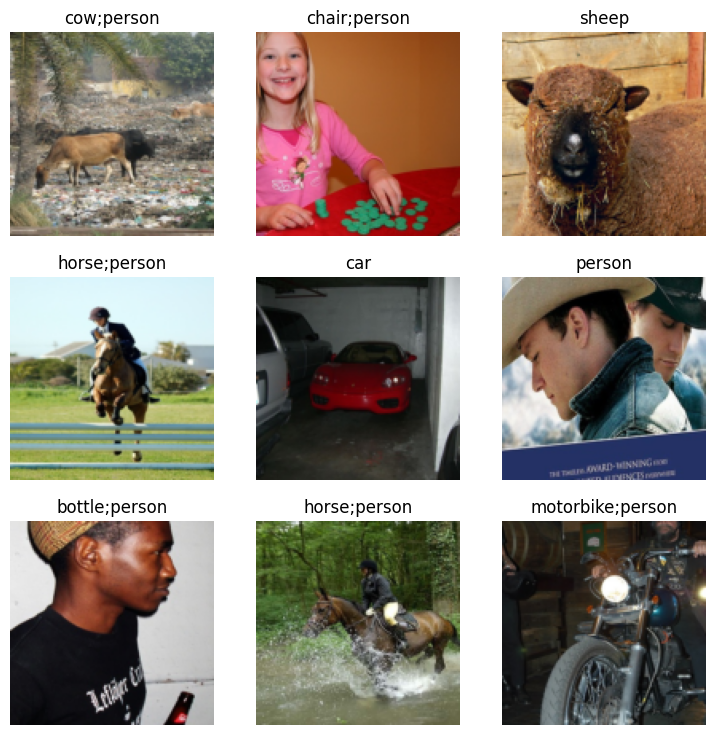

In [21]:
dls.show_batch(nrows=3, ncols=3)

In [27]:
learn = vision_learner(dls, resnet18)

AttributeError: summary